In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
!which python

/Users/diegopiccinotti/opt/anaconda3/bin/python


In [3]:
budget = 10000
env = "RaceStrategy"
particles = [2,4,6,8,10,12,14,16,18,20]

df = pd.read_csv("{}/pf_{}/data_eval_pf_{}_{}.csv".format(env,budget,env,budget))
df['type'] = ["pf"]*df.shape[0]
df

,agent,total_reward,discounted_reward,length,budget,pit_count,type
0,2_pf,7.302244,6.653026,20,10000,2,pf
1,2_pf,7.381318,6.718358,20,10000,2,pf
2,2_pf,7.265317,6.620890,20,10000,2,pf
3,2_pf,7.437000,6.774867,20,10000,3,pf
4,2_pf,7.342409,6.693573,20,10000,2,pf
...,...,...,...,...,...,...,...
195,20_pf,6.413657,5.803385,20,10000,12,pf
196,20_pf,6.412257,5.803520,20,10000,12,pf
197,20_pf,6.429150,5.821008,20,10000,12,pf
198,20_pf,6.465520,5.852858,20,10000,12,pf


In [4]:
df_dpw = pd.read_csv("{}/dpw_{}/dpw_mcts_only_{}_{}_data_exp_0.csv".format(env,budget,env,budget))
df_dpw['type'] = ["dpw"]*df_dpw.shape[0]
df_dpw['agent'] = ["dpw"]*df_dpw.shape[0]
df_dpw

,agent,total_reward,discounted_reward,length,budget,pit_count,type
0,dpw,7.309282,6.665807,20,10000,2,dpw
1,dpw,7.378389,6.719287,20,10000,3,dpw
2,dpw,7.308863,6.655196,20,10000,3,dpw
3,dpw,7.335766,6.682259,20,10000,2,dpw
4,dpw,7.357528,6.707978,20,10000,2,dpw
5,dpw,7.314631,6.652096,20,10000,3,dpw
6,dpw,7.303193,6.656314,20,10000,2,dpw
7,dpw,7.284807,6.634134,20,10000,2,dpw
8,dpw,7.300200,6.656147,20,10000,3,dpw
9,dpw,7.281377,6.632788,20,10000,2,dpw


In [5]:
df2 = pd.read_csv("{}/paper_{}/data.csv".format(env,budget))
df2 = df2[~df2.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
df2 = df2.sort_values(by="agent")
df2['type'] = ["paper"]*df2.shape[0]

#dfs = [df2.copy(deep=True) for _ in range(len(particles))]

#for i in range(len(particles)):
#    dfs[i]['Particles'] = [particles[i]] * dfs[i].shape[0]
    

df3 = pd.concat([df, df2, df_dpw], ignore_index=True)
df3 = df3.sort_values(by="agent")

df3

/Users/diegopiccinotti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


,agent,budget,discounted_reward,length,pit_count,return,seed,total_reward,type
98,10_pf,10000,5.940190,20,9,NaN,NaN,6.553577,pf
97,10_pf,10000,5.970909,20,9,NaN,NaN,6.584694,pf
96,10_pf,10000,5.973378,20,9,NaN,NaN,6.592866,pf
95,10_pf,10000,5.932399,20,9,NaN,NaN,6.550964,pf
94,10_pf,10000,5.872490,20,9,NaN,NaN,6.479282,pf
...,...,...,...,...,...,...,...,...,...
389,random,10000,NaN,20,8,6.207277,82756235.0,6.808333,paper
388,random,10000,NaN,20,8,6.076819,82756217.0,6.675059,paper
387,random,10000,NaN,20,7,6.287083,82756226.0,6.878024,paper
365,random,10000,NaN,20,8,6.131732,82756245.0,6.750933,paper


Saving total_reward plot to RaceStrategy/racestrategy_total_reward_10000.png


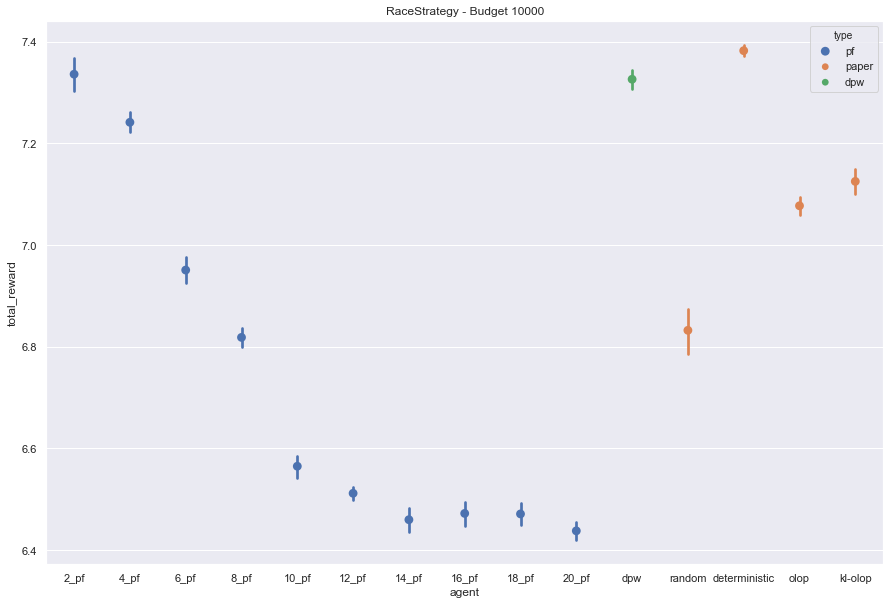

In [6]:
# print("Reading data from {}".format(data_path))
# df = pd.read_csv(data_path)
# df = df[~df.agent.isin(['agent'])].apply(pd.to_numeric, errors='ignore')
#df = df.sort_values(by="Particles")

#fig, ax = plt.subplots()
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
# ax.set(xscale="log")
# sns.barplot(x="Particles", y="Cumulative reward", hue="Particles", data=df, dodge=False)
#sns.pointplot(x="Particles", y="Cumulative reward", ax=ax, data=df, join=False, grid=True)
plot = sns.pointplot(x="agent", y="total_reward", data=df3, hue="type", legend=False, join=False,
                    order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])
#plot2 = sns.pointplot(x="agent", y="total_reward", hue="type", data=df, legend=False)

plot.set_title("{} - Budget {}".format(env, budget))


field_path = "{}/{}_total_reward_{}.png".format(env, env.lower(), budget)
plot.get_figure().savefig(field_path, bbox_inches='tight')
# plt.show()
print("Saving total_reward plot to {}".format(field_path))

Saving pit_count plot to RaceStrategy/racestrategy_pit_count_10000.png


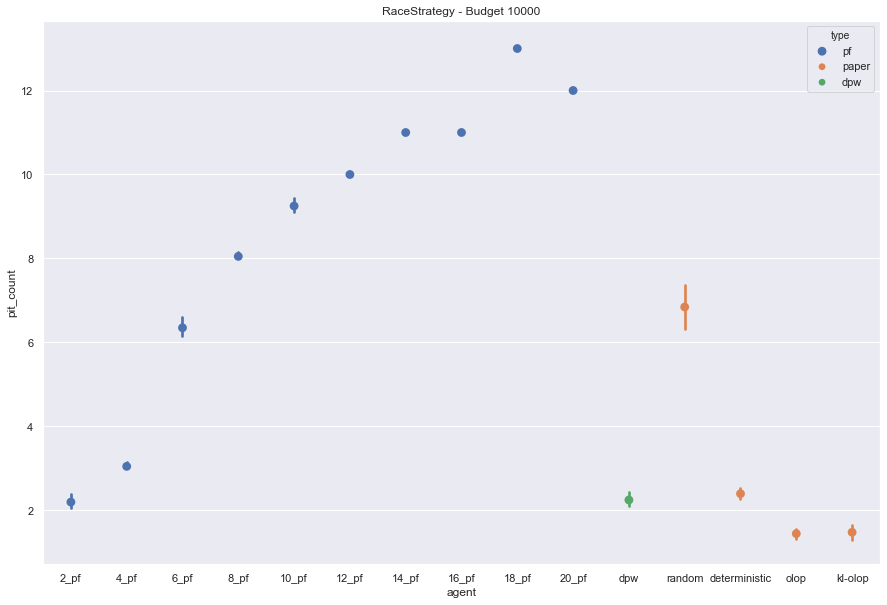

In [7]:
plt.figure(figsize=(15, 10))


plot = sns.pointplot(x="agent", y="pit_count", data=df3, hue="type", legend=False, join=False,
                        order=["2_pf", "4_pf", "6_pf", "8_pf", "10_pf", "12_pf", "14_pf","16_pf","18_pf","20_pf", "dpw", "random", "deterministic", "olop", "kl-olop"])
#plot2 = sns.pointplot(x="agent", y="total_reward", hue="type", data=df, legend=False)

plot.set_title("{} - Budget {}".format(env, budget))


field_path = "{}/{}_pit_count_{}.png".format(env, env.lower(), budget)
plot.get_figure().savefig(field_path, bbox_inches='tight')
# plt.show()
print("Saving pit_count plot to {}".format(field_path))